In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

In [2]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

In [3]:
# Define a function to load the dataset
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('AMZN')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
0,2015-01-02,15.4260,15.4260,15.7375,15.3480,15.6290,55664000
1,2015-01-05,15.1095,15.1095,15.4190,15.0425,15.3505,55484000
2,2015-01-06,14.7645,14.7645,15.1500,14.6190,15.1120,70380000
3,2015-01-07,14.9210,14.9210,15.0640,14.7665,14.8750,52806000
4,2015-01-08,15.0230,15.0230,15.1570,14.8055,15.0160,61768000


In [5]:
df.tail()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
2495,2024-12-02,210.710007,210.710007,212.990005,209.509995,209.960007,39523200
2496,2024-12-03,213.440002,213.440002,214.020004,209.649994,210.309998,32214800
2497,2024-12-04,218.160004,218.160004,220.000000,215.750000,215.960007,48745700
2498,2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200
2499,2024-12-06,227.029999,227.029999,227.149994,220.600006,220.750000,44123400


In [6]:
df.columns

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AMZN'),
            (    'Close', 'AMZN'),
            (     'High', 'AMZN'),
            (      'Low', 'AMZN'),
            (     'Open', 'AMZN'),
            (   'Volume', 'AMZN')],
           names=['Price', 'Ticker'])

In [7]:
df.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [8]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02,15.426000,15.426000,15.737500,15.348000,15.629000,55664000
1,2015-01-05,15.109500,15.109500,15.419000,15.042500,15.350500,55484000
2,2015-01-06,14.764500,14.764500,15.150000,14.619000,15.112000,70380000
3,2015-01-07,14.921000,14.921000,15.064000,14.766500,14.875000,52806000
4,2015-01-08,15.023000,15.023000,15.157000,14.805500,15.016000,61768000
...,...,...,...,...,...,...,...
2495,2024-12-02,210.710007,210.710007,212.990005,209.509995,209.960007,39523200
2496,2024-12-03,213.440002,213.440002,214.020004,209.649994,210.309998,32214800
2497,2024-12-04,218.160004,218.160004,220.000000,215.750000,215.960007,48745700
2498,2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200


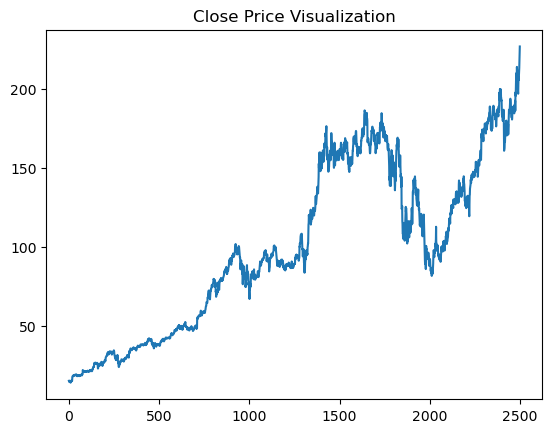

In [9]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

# Plotting moving averages of 100 day

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2495    186.870301
2496    187.059801
2497    187.314201
2498    187.589501
2499    187.980501
Name: Close, Length: 2500, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

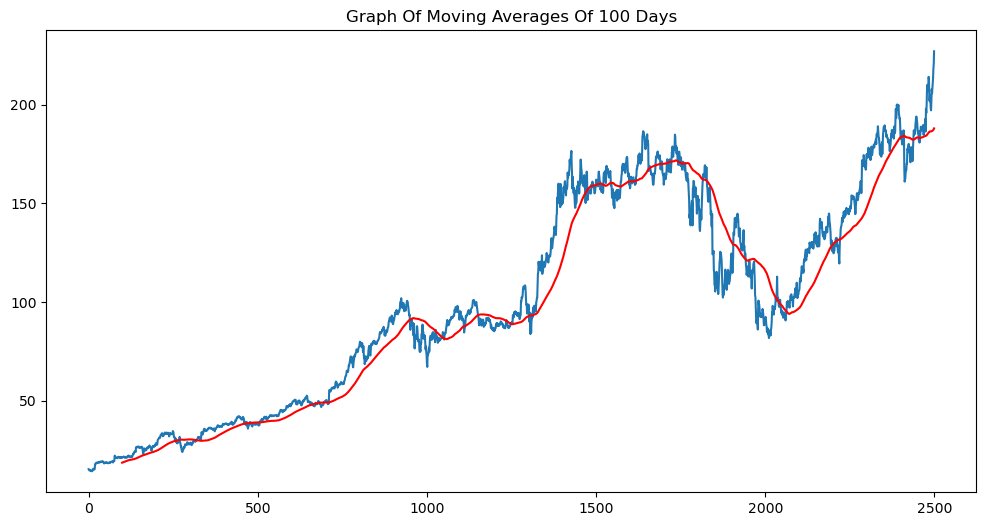

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.title('Graph Of Moving Averages Of 100 Days')

1. If the stock price is above the 100-day MA, it indicates that the stock is currently performing better than its average over the past 100 days, often signaling bullish sentiment. If the stock price is below the 100-day MA, it signals that the stock is underperforming compared to its average price over the past 100 days, often indicating bearish sentiment.
2. key for identifying buy signals (stock price crossing above 100-day MA) or sell signals (stock price crossing below 100-day MA) and understanding the current trend of the stock.

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2495    184.68985
2496    184.90950
2497    185.16490
2498    185.42470
2499    185.68695
Name: Close, Length: 2500, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

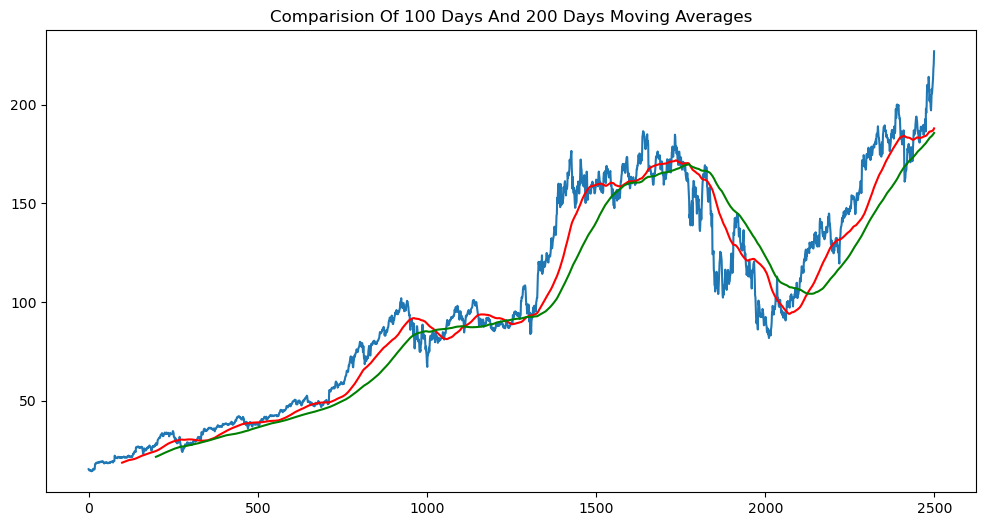

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

1. Golden Cross: This occurs when the 100-day MA crosses above the 200-day MA. It is often considered a bullish signal, suggesting that the stock's price is gaining momentum and the trend may be shifting from a bearish (downward) to a bullish (upward) phase.
Example: If the 100-day MA is below the 200-day MA and then moves above it, it indicates that the short-term trend is strengthening, potentially   
leading to higher prices.

2. Death Cross: This happens when the 100-day MA crosses below the 200-day MA. It is typically seen as a bearish signal, suggesting that the stock's price might be losing momentum, and the trend could shift from bullish to bearish
Example: If the 100-day MA is above the 200-day MA and then drops below it, this indicates a weakening of the short-term momentum, potentially leading   to a downward trend.

In [14]:
df.shape

(2500, 7)

In [15]:
train_size = int(len(data) * 0.7)  # 80% for training, 20% for testing
train_data =data[0:train_size]
test_data = data[train_size:int(len(data))]


In [16]:
train_data

,Date,Adj Close,Close,High,Low,Open,Volume
0,2015-01-02,15.426000,15.426000,15.737500,15.348000,15.629000,55664000
1,2015-01-05,15.109500,15.109500,15.419000,15.042500,15.350500,55484000
2,2015-01-06,14.764500,14.764500,15.150000,14.619000,15.112000,70380000
3,2015-01-07,14.921000,14.921000,15.064000,14.766500,14.875000,52806000
4,2015-01-08,15.023000,15.023000,15.157000,14.805500,15.016000,61768000
...,...,...,...,...,...,...,...
1745,2021-12-07,176.164505,176.164505,177.499496,173.334503,174.600006,66410000
1746,2021-12-08,176.158005,176.158005,177.179993,174.750504,176.150497,45254000
1747,2021-12-09,174.171005,174.171005,176.969498,174.139496,175.750000,46062000
1748,2021-12-10,172.212006,172.212006,175.927002,170.500000,175.417007,60690000


In [17]:
test_data

,Date,Adj Close,Close,High,Low,Open,Volume
1750,2021-12-14,169.091507,169.091507,169.498993,166.440002,167.550003,55976000
1751,2021-12-15,173.315002,173.315002,173.600006,165.195007,168.598007,75794000
1752,2021-12-16,168.871002,168.871002,174.166000,168.160507,173.368500,60876000
1753,2021-12-17,170.017502,170.017502,170.898499,165.613495,167.710495,85542000
1754,2021-12-20,167.078995,167.078995,167.874496,165.600006,166.850006,57372000
...,...,...,...,...,...,...,...
2495,2024-12-02,210.710007,210.710007,212.990005,209.509995,209.960007,39523200
2496,2024-12-03,213.440002,213.440002,214.020004,209.649994,210.309998,32214800
2497,2024-12-04,218.160004,218.160004,220.000000,215.750000,215.960007,48745700
2498,2024-12-05,220.550003,220.550003,222.149994,217.300003,218.029999,41140200


In [18]:
train_close = train_data.iloc[:, 4:5].values
test_close = test_data.iloc[:, 4:5].values

In [19]:
from sklearn.preprocessing import MinMaxScaler
# Step 2: Scale the training data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_close) 
test_data_scaled = scaler.transform(test_close)

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100

# Create dataset for training and testing
X_train, y_train = create_dataset(train_data_scaled, time_step)
X_test, y_test = create_dataset(test_data_scaled, time_step)

In [22]:
X_train.shape

(1649, 100)

In [23]:
X_test.shape

(649, 100)

In [24]:
# Step 5: Reshape the data to be 3D for LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [25]:
model= Sequential()
model.add(LSTM(units = 50, return_sequences=True
              ,input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60,return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80,return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['MAE'])

In [28]:
model.fit(X_train, y_train, validation_data = (X_test, y_test) ,epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - MAE: 0.1849 - loss: 0.0775 - val_MAE: 0.0586 - val_loss: 0.0050
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - MAE: 0.0504 - loss: 0.0056 - val_MAE: 0.0505 - val_loss: 0.0041
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - MAE: 0.0465 - loss: 0.0050 - val_MAE: 0.0524 - val_loss: 0.0042
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - MAE: 0.0495 - loss: 0.0056 - val_MAE: 0.0453 - val_loss: 0.0040
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - MAE: 0.0477 - loss: 0.0049 - val_MAE: 0.0560 - val_loss: 0.0046
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - MAE: 0.0460 - loss: 0.0049 - val_MAE: 0.0698 - val_loss: 0.0069
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - MAE: 0.0458 - loss: 0.0045 - val_MAE: 0.0550 - val_loss: 0.0045
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - MAE: 0.0417 - loss: 0.0041 - val_MAE: 0.0426 - val_loss: 0.0033
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/ste

In [29]:
#Make predictions on the test data
predictions = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step


In [30]:
#Inverse transform the predictions and actual values back to the original price range
predictions = scaler.inverse_transform(predictions)  # Inverse scale the predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse scale the actual values

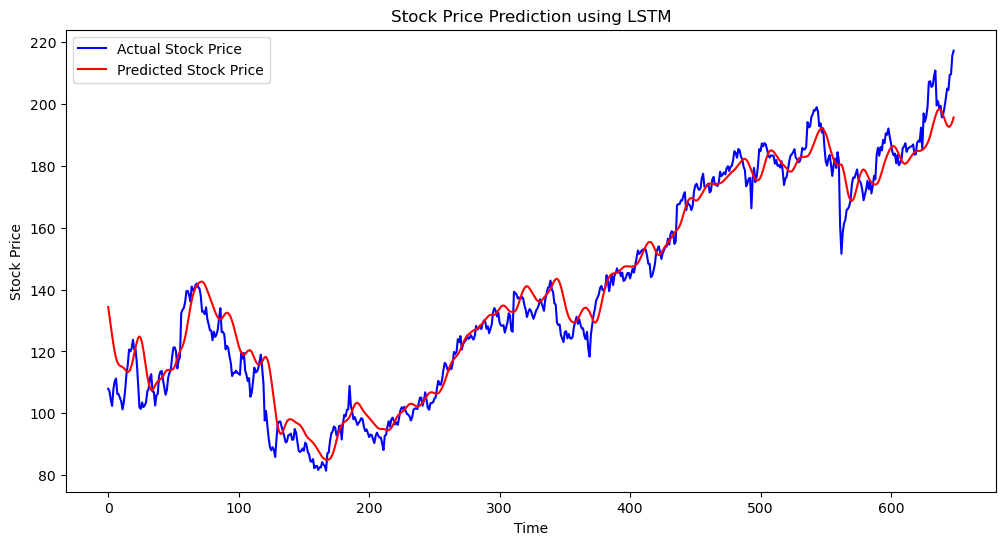

In [31]:
#  Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Stock Price', color='blue')
plt.plot(predictions, label='Predicted Stock Price', color='red')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [32]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test_actual, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 7.056209596689362


In [33]:
train_predict = model.predict(X_train)

52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [34]:
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))

In [35]:
train_rmse = math.sqrt(mean_squared_error(y_train_actual, train_predict))
print(f'Root Mean Squared Error (RMSE): {train_rmse}')

Root Mean Squared Error (RMSE): 3.75370577702273


In [36]:
#Predict the next 30 days
last_100_days = test_data_scaled[-100:].reshape(1, 100, 1) 
predicted_prices = []

In [37]:
# Predict 30 days ahead, one day at a time
for i in range(30):
    input_data = last_100_days
    predicted_price = model.predict(input_data)
    predicted_prices.append(predicted_price[0, 0])
    
    # Update the last 100 days by appending the predicted price
    last_100_days = np.append(last_100_days[:, 1:, :], predicted_price.reshape(1, 1, 1), axis=1)

# Step 8: Inverse transform the predictions to get actual stock prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━

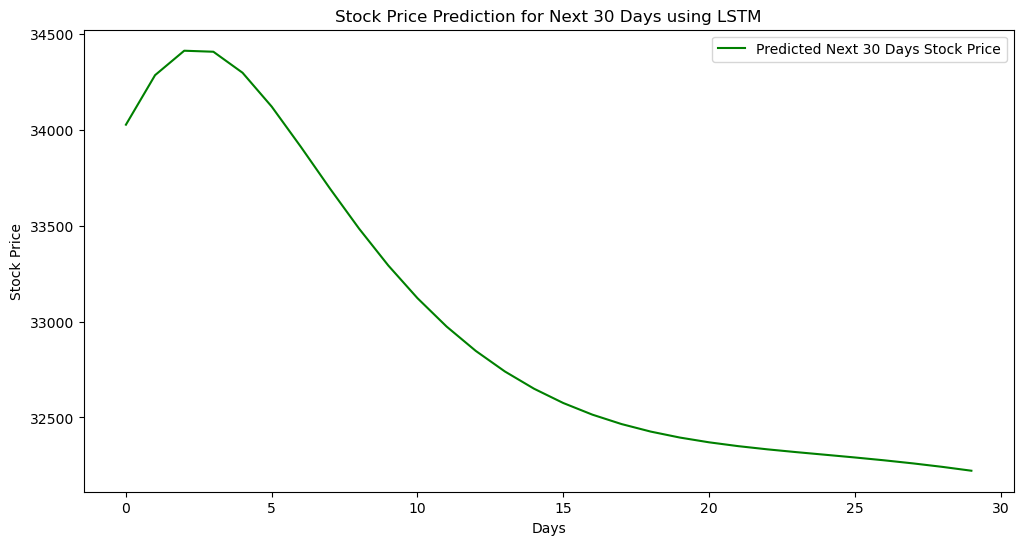

In [38]:
# Step 8: Inverse transform the predictions to get actual stock prices
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Step 9: Plot the predicted next 30 days of stock prices
plt.figure(figsize=(12, 6))
plt.plot(predicted_prices, label='Predicted Next 30 Days Stock Price', color='green')
plt.title('Stock Price Prediction for Next 30 Days using LSTM')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

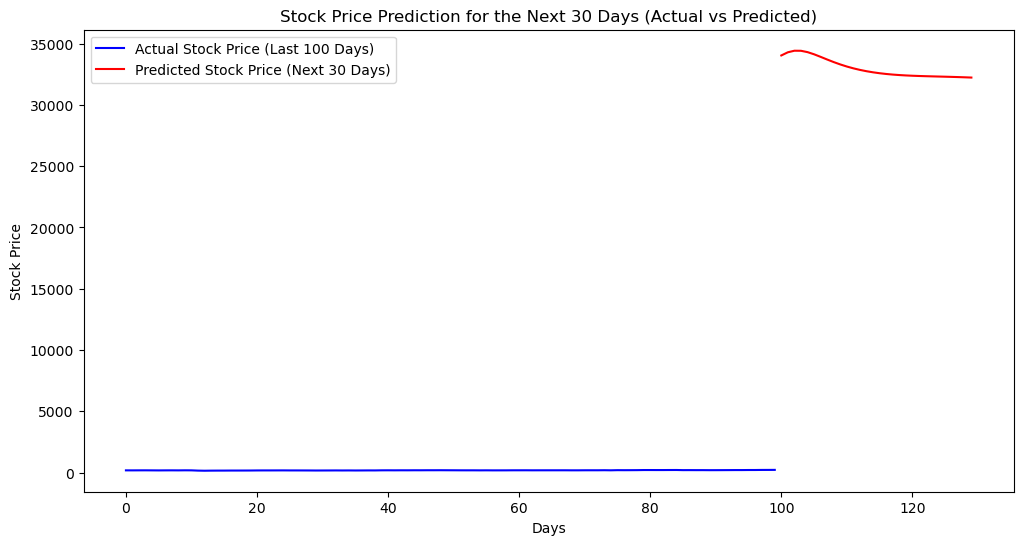

In [40]:
# Plot the actual stock prices for the last 100 days
plt.figure(figsize=(12, 6))
plt.plot(time_actual,actual_prices_last_100, label='Actual Stock Price (Last 100 Days)', color='blue')
# Plot the predicted stock prices for the next 30 days
plt.plot(time_predicted, predicted_prices, label='Predicted Stock Price (Next 30 Days)', color='red')


# Add title and labels
plt.title('Stock Price Prediction for the Next 30 Days (Actual vs Predicted)')
plt.xlabel('Days')
plt.ylabel('Stock Price')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [41]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test_actual

# Predicted values
predicted = predictions

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.959017742356315


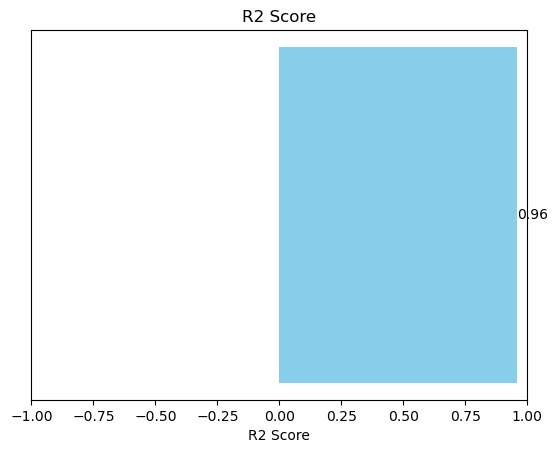

In [44]:
#Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')
plt.show()

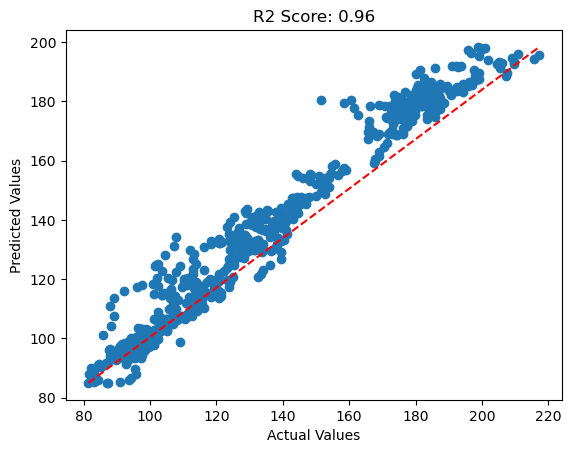

In [43]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()